### basic processing of a voice signal
* STFT
* F0
* MFCC


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import seaborn as ans

In [27]:
filename = "voice_clips_meta_data.csv"
list_clip = pd.read_csv(filename)

* some selected audio files in the common voice collection
* audiofile = list_clip.path[100]
* audiofile = "common_voice_en_32810621.mp3" # eighties female
* audiofile = "common_voice_en_30282850.mp3" # fifties female
* audiofile = "common_voice_en_32879293.mp3" # eighties male
* audiofile = "common_voice_en_32260076.mp3" # twenties female
* audiofile = "common_voice_en_20002554.mp3" # sixties male
* audiofile = "common_voice_en_30615145.mp3"  # teen male

In [195]:
data_dir = '/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/voice_clips/'
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile)
x.shape, sr

((143678,), 22050)

In [196]:
x, sr = librosa.load(data_dir+audiofile, sr = None) # taking the original sampling rate of the mp3 file
print(x.shape, sr)
x, sr = librosa.load(data_dir+audiofile, sr = 8000) #resampling at 8000
print(x.shape, sr)


(208512,) 32000
(52128,) 8000


In [197]:
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile,sr=None)
D = librosa.stft(y=x)
x.shape, sr, D.shape

((208512,), 32000, (1025, 408))

In [199]:
D.shape[0] == 1 + 2048/2, D.shape[1] * (2048/4),  x.shape[0]

(True, 208896.0, 208512)

In [200]:
type(D[0,0])

numpy.complex64

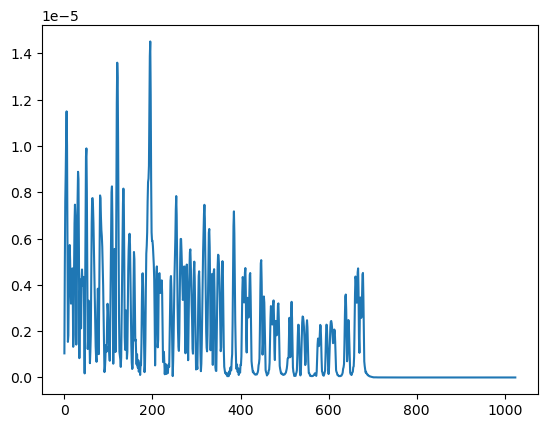

In [201]:
plt.plot(np.abs(D[:,0]))

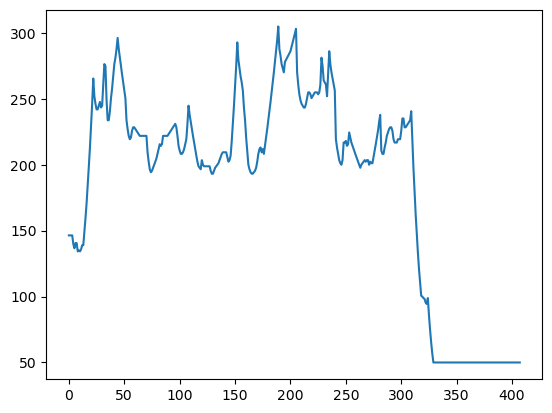

In [207]:
f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr, fmin=50, fmax=1000, fill_na=None)
plt.plot(f0)

In [222]:
f0.shape, voiced_flag.shape, voiced_probs.shape, x.shape[0]/f0.shape[0]

((408,), (408,), (408,), 511.05882352941177)

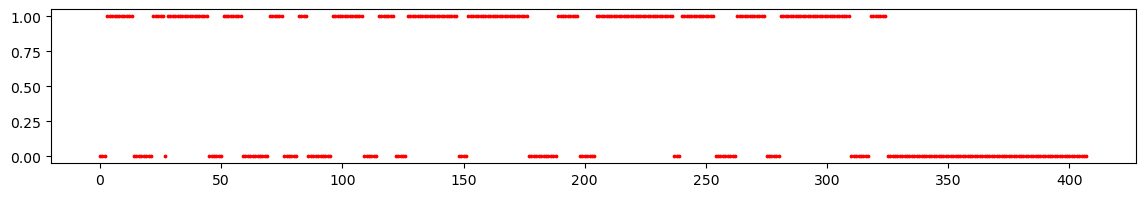

In [218]:
plt.figure(figsize=(14, 2))
plt.scatter(range(voiced_flag.shape[0]),voiced_flag*1, s=3,color = "r")

In [31]:
voiced_flag[50:60], f0[50:60]

(array([ True,  True,  True, False, False, False, False,  True,  True,
         True]),
 array([201.74088951, 195.99771799, 195.99771799, 199.42369775,
        202.90956259, 206.45635927, 210.06515286, 213.73702705,
        218.73289324, 218.73289324]))

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

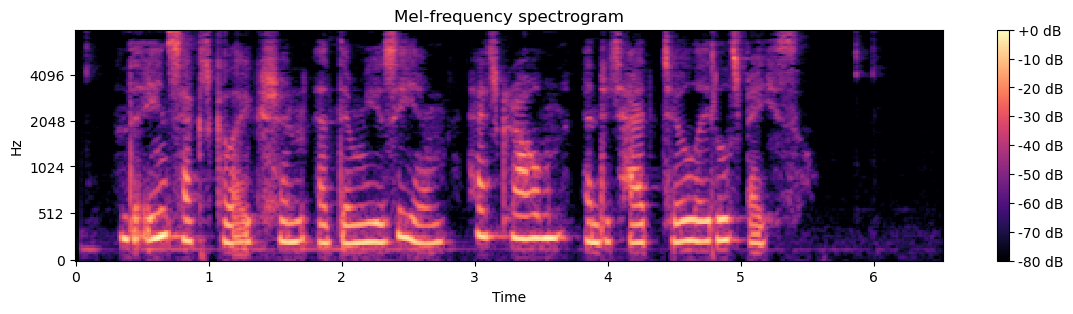

In [221]:
fig, ax = plt.subplots(figsize=(14, 3))

S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [202]:
# sampling rate for 125 microsecond sampling gap 
# number of smaple for signal of 32 miliseconds length
1/0.000125, 32/0.125

(8000.0, 256.0)

In [206]:
M = librosa.feature.melspectrogram(y=x, sr=sr, n_mels = 128)
M.shape

(128, 408)

In [ ]:
D = np.abs(librosa.stft(x))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

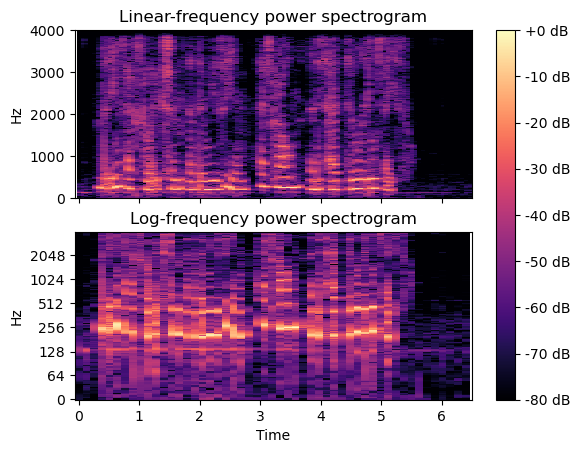

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time', 
                         sr=sr, hop_length=hop_length, ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [61]:
tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 93.75 beats per minute


In [62]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([0.512, 1.216, 1.856, 2.496, 3.136, 3.904, 4.544])

In [64]:
import soundcard as sc
default_speaker = sc.default_speaker() # get the default speaker
default_mic = sc.default_microphone() # get the default microphone
print(default_speaker)
print(default_mic)

<Speaker HDMI (2 channels)>
<Microphone Built-in Microphone (2 channels)>


In [78]:
sr = 48000 # set sample rate and duration of recording
num_second = 6
# or ask user to specify sample rate and duration of recording
#sample_rate = int(input('enter desired sample rate (samples per second: '))
#num_second = int(input('enter number of second to record: '))

num_frames = sr * int(num_second)
audiodata = default_mic.record(samplerate=sr, numframes=num_frames)
# In the beginning was the Word, and the Word was with God, and the Word was God.

In [94]:
audiodata

array([[-0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.24708099e-04,  2.24708099e-04],
       [ 3.81864083e-05,  3.81864083e-05],
       [ 1.24829836e-04,  1.24829836e-04]])

In [96]:
import soundfile as sf

# Write out audio as 24bit PCM WAV
sf.write('John_1_1.wav', audiodata, 48000, subtype='PCM_24')

In [97]:
audiodata.shape

(288000, 2)

In [79]:
default_speaker.play(audiodata, samplerate=sr)

In [82]:
# should we normalize?
default_speaker.play(audiodata/np.max(audiodata), samplerate=sr)

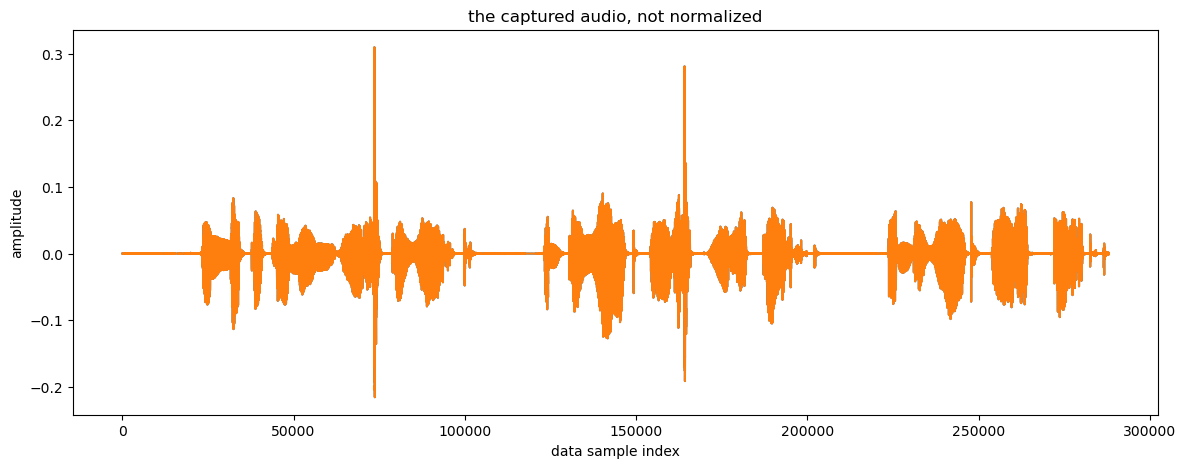

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

# plot the signal
plt.title("the captured audio, not normalized") 
plt.xlabel("data sample index") 
plt.ylabel("amplitude") 
plt.plot(audiodata)
plt.show()

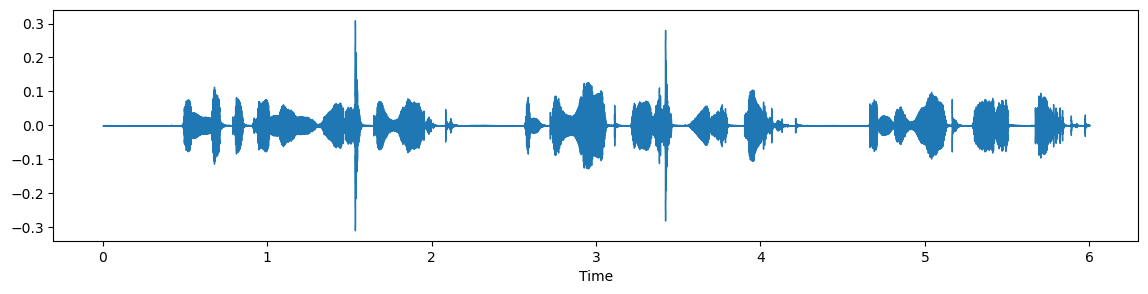

In [225]:
my_voice = "John_1_1.wav" # Ying's voice
y, y_sr = librosa.load(my_voice, sr=None, mono=False)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=y_sr)

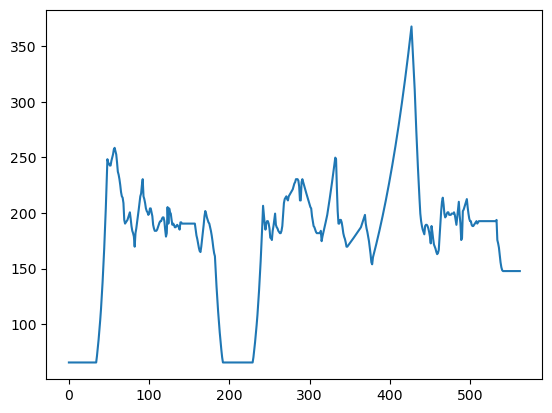

In [227]:
f0, voiced_flag, voiced_probs = librosa.pyin(y[0,], sr=y_sr, 
        fmin=librosa.note_to_hz('C2'), 
        fmax=librosa.note_to_hz('C8'), fill_na=None)
plt.plot(f0)

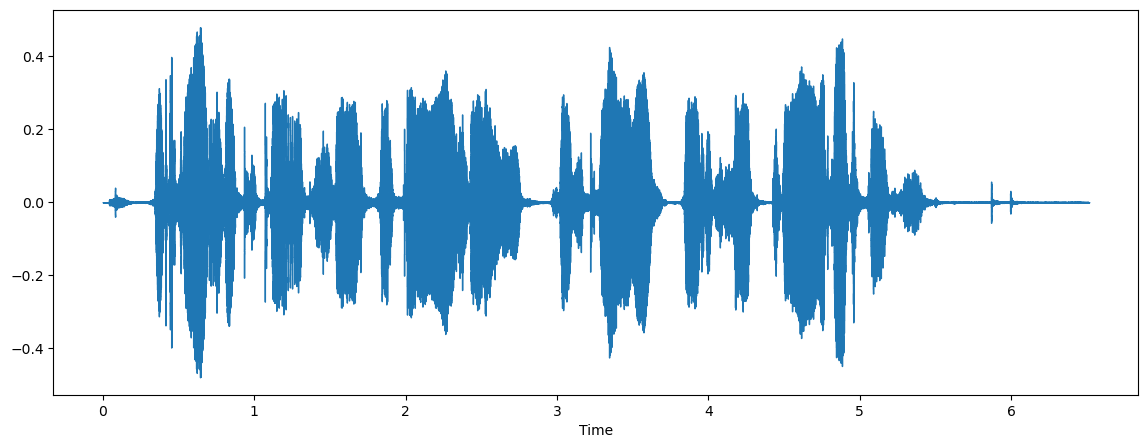

In [85]:
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

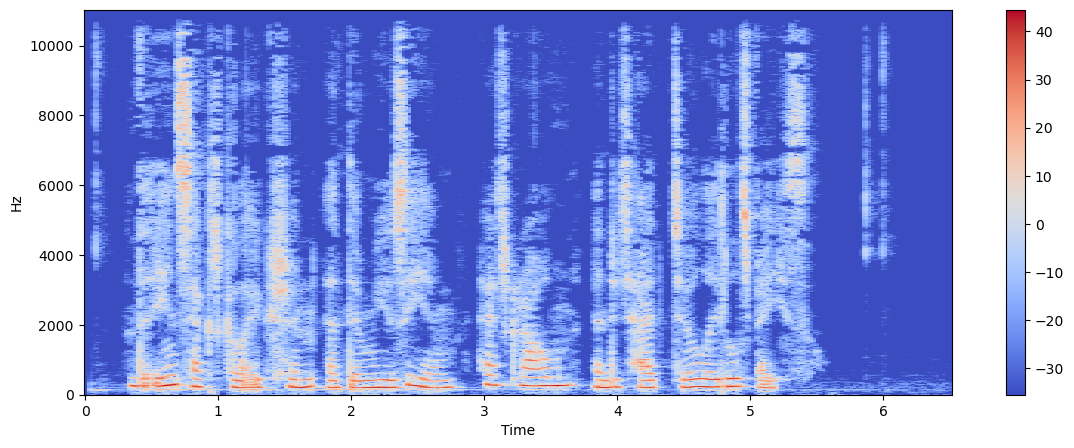

In [86]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

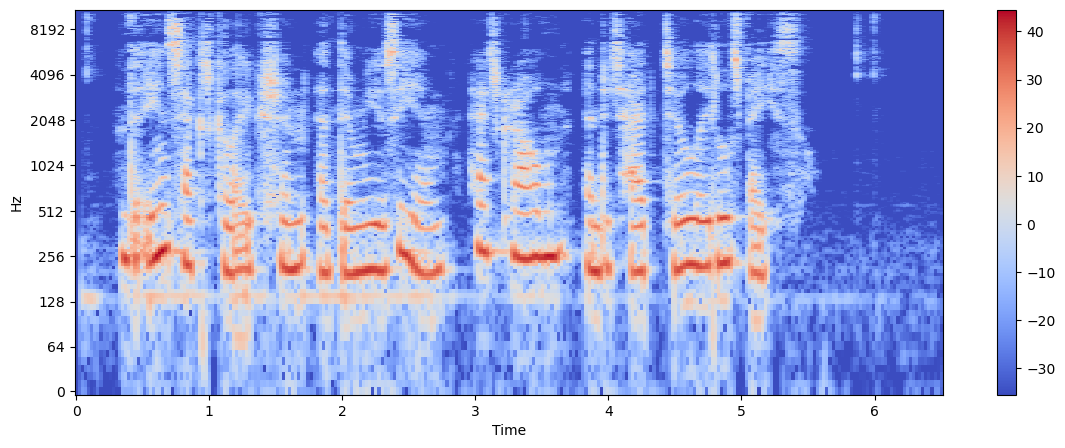

In [88]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [89]:
mfcc = librosa.feature.mfcc(y=x, sr=sr)
mfcc.shape

(20, 281)

<Axes: >

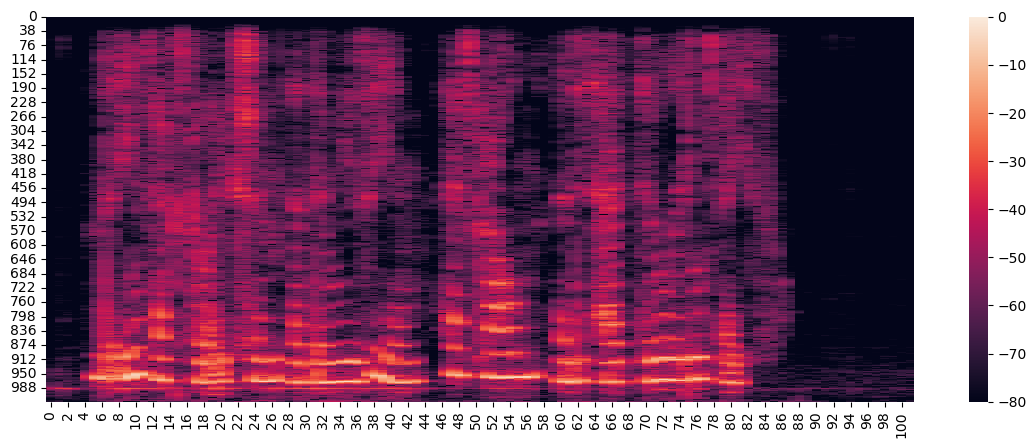

In [57]:
import seaborn as sns
plt.figure(figsize=(14, 5))
fft = librosa.stft(y=x)
sns.heatmap(np.flip(librosa.amplitude_to_db(abs(fft),ref=np.max), axis =0))

/var/folders/kf/38b2x8pj2x50xtns4nqt6ysw0000gn/T/ipykernel_64153/1390529800.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(fft,


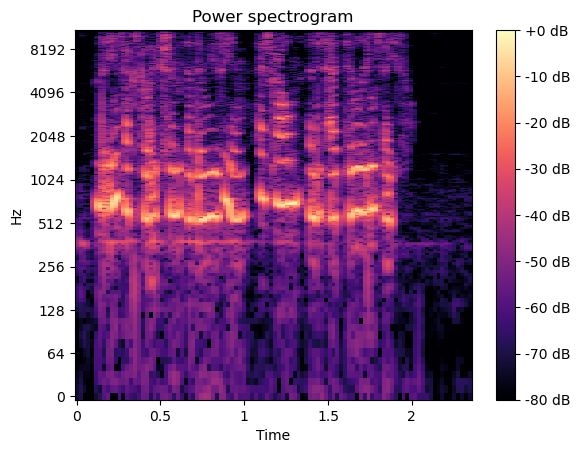

In [47]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(fft,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")